### Exploratory Data analysis of COVID-19 in India

<img src="https://www.fda.gov/files/covid19-1600x900.jpg" width="500"/>

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China in December 2019. The disease has since spread worldwide, leading to an ongoing pandemic.


#### COVID-19 in India

The COVID-19 pandemic in India is a part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case of COVID-19 in India, which originated from China, was reported on 30 January 2020. Currently, India has the largest number of confirmed cases in Asia. As of 12 June 2021, India has the second-highest number of confirmed cases in the world (after the United States) with 29.3 million reported cases of COVID-19 infection and the third-highest number of COVID-19 deaths (after the United States and Brazil) at 367,081 deaths.
**[taken from Wikipedia]**

#### This is an exploratory data analysis and visualization of COVID-19 in India. 
**The data is taken from Wikipedia page which is connected to the official information source maintained by Government and updated frequently, which I verified**

#### Importing required  packages

In [129]:
import numpy as np
import folium
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
% matplotlib inline
import re
import seaborn as sns
import plotly.express as px

#### Capturing lat and lon values from www.quicksgs.com for Indian states

In [130]:
location = pd.read_html("http://www.quickgs.com/latitudinal-and-longitudinal-extents-of-india-indian-states-and-cities/") 
coords=pd.DataFrame(location[0])
coords.head()

,State,Latitude,Longitude
0,Andhra Pradesh,15.91°N,79.74°E
1,Arunachal Pradesh,28.21°N,94.72°E
2,Assam,26.20°N,92.93°E
3,Bihar,25.09°N,85.31°E
4,Chhattisgarh,21.27°N,81.86°E


#### Data grabbed from Wikipedia page :   https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/India_medical_cases_by_state_and_union_territory

In [131]:
covidstats = pd.read_html('https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/India_medical_cases_by_state_and_union_territory')
covid_data=pd.DataFrame(covidstats[0])
covid_data=covid_data.iloc[:36]
covid_data.dropna(axis=1,how='all',inplace=True)
covid_data


[show all].mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}viewtalkeditCOVID-19 pandemic in India by state and union territory  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                State/Union Territory   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              36 / 36   
0                         Andaman and Nicobar Islands                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

#### Function for convert lat-lon values to float numbers for applying to the dataframe

In [132]:
def data_prep(cord):
    return cord[0:5]
coords['Latitude']  = coords['Latitude'].apply(data_prep).astype('float')
coords['Longitude'] = coords['Longitude'].apply(data_prep).astype('float')
coords.head()
#coords


,State,Latitude,Longitude
0,Andhra Pradesh,15.91,79.74
1,Arunachal Pradesh,28.21,94.72
2,Assam,26.20,92.93
3,Bihar,25.09,85.31
4,Chhattisgarh,21.27,81.86


#### Renaming Attribute Names for simplicity

In [133]:
covid_data.columns = ['State','Total cases','Deaths','Recoveries','Active cases']
covid_data=covid_data.reset_index(drop=True)
covid_data.columns
covid_DATA=pd.DataFrame(covid_data)
covid_DATA=covid_DATA.reset_index(drop=True)

#### Cleaning the data obtained from source ( parse into numbers, cleaning strings, wrong data entry ..)

In [134]:
covid_DATA['Total cases']=pd.to_numeric(covid_DATA['Total cases'],errors='ignore')
covid_DATA['Deaths']=pd.to_numeric(covid_DATA['Deaths'],errors='ignore')
covid_DATA['Total cases'][3]=covid_DATA['Total cases'][3][:7]
covid_DATA['Deaths'][16]=covid_DATA['Deaths'][16][:6]
covid_DATA['Deaths'][16]=covid_DATA['Deaths'][16].replace(',','')
covid_DATA['Total cases'][3]=covid_DATA['Total cases'][3].replace(',','')
covid_DATA

,State,Total cases,Deaths,Recoveries,Active cases
0,Andaman and Nicobar Islands,7438,127,7210,101
1,Andhra Pradesh,1862036,12452,1798380,51204
2,Arunachal Pradesh,33916,160,31189,2567
3,Assam,490907,4310,454726,31871
4,Bihar,720505,9569,708231,2705
5,Chandigarh,61520,807,60446,267
6,Chhattisgarh,992074,13407,971057,7610
7,Dadra and Nagar Haveli and Daman and Diu,10523,4,10459,60
8,Delhi,1433366,24940,1406629,1797
9,Goa,165197,3013,159419,2765


#### Merging the lat-lon dataframe onto the Covid data to create a full dataframe

In [135]:
final_data = pd.merge(coords, covid_DATA, how ='inner', on ='State')
final_data

,State,Latitude,Longitude,Total cases,Deaths,Recoveries,Active cases
0,Andhra Pradesh,15.91,79.74,1862036,12452,1798380,51204
1,Arunachal Pradesh,28.21,94.72,33916,160,31189,2567
2,Assam,26.20,92.93,490907,4310,454726,31871
3,Bihar,25.09,85.31,720505,9569,708231,2705
4,Chhattisgarh,21.27,81.86,992074,13407,971057,7610
5,Goa,15.29,74.12,165197,3013,159419,2765
6,Gujarat,22.25,71.19,822758,10040,807911,4807
7,Haryana,29.05,76.08,767900,9314,756426,2160
8,Himachal Pradesh,31.10,77.17,201049,3461,195301,2287
9,Jharkhand,23.61,85.27,344914,5104,338446,1364


#### Casting values into integer types for loading into the folium map

In [136]:
final_data['Total cases']=final_data['Total cases'].astype(str).astype(int)
final_data['Deaths']=final_data['Deaths'].astype(str).astype(int)
final_data['Recoveries']=final_data['Recoveries'].astype(str).astype(int)
final_data['Active cases']=final_data['Active cases'].astype(str).astype(int)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         27 non-null     object 
 1   Latitude      27 non-null     float64
 2   Longitude     27 non-null     float64
 3   Total cases   27 non-null     int32  
 4   Deaths        27 non-null     int32  
 5   Recoveries    27 non-null     int32  
 6   Active cases  27 non-null     int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 1.3+ KB


In [137]:
final_data.iloc[:,3:].describe().astype('int')

,Total cases,Deaths,Recoveries,Active cases
count,27,27,27,27
mean,1018338,13194,983001,22142
std,1308974,23065,1256002,36209
min,18624,86,14096,1364
25%,115409,2043,109198,2478
50%,720505,8827,708231,4312
75%,1239718,12929,1209283,26297
max,5997587,119303,5753290,124994


#### Barplots of all the features below

Text(0.5,1,' Total cases vs State')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



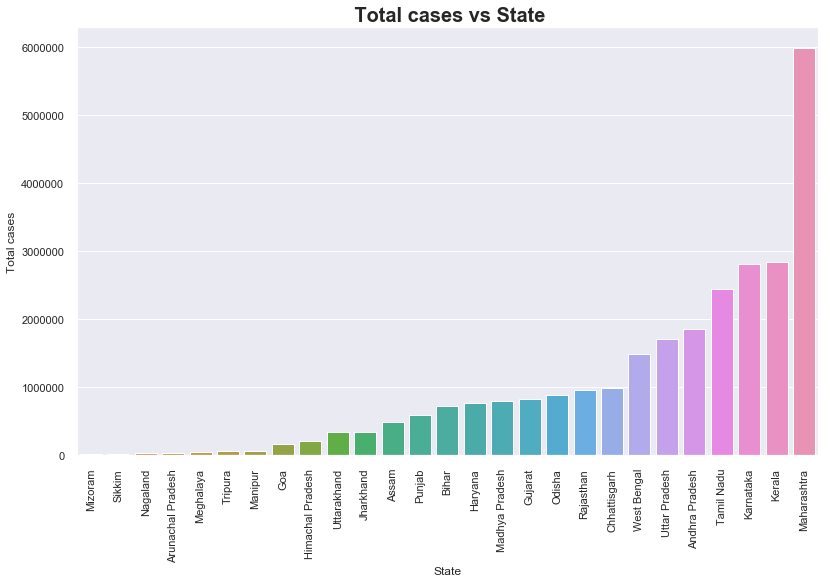

In [138]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=final_data.sort_values(by='Total cases'),x='State',y='Total cases')
plt.xticks(rotation='vertical')
plt.title(" Total cases vs State",fontweight="bold",fontsize=20)

Text(0.5,1,' Number of deaths vs State')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



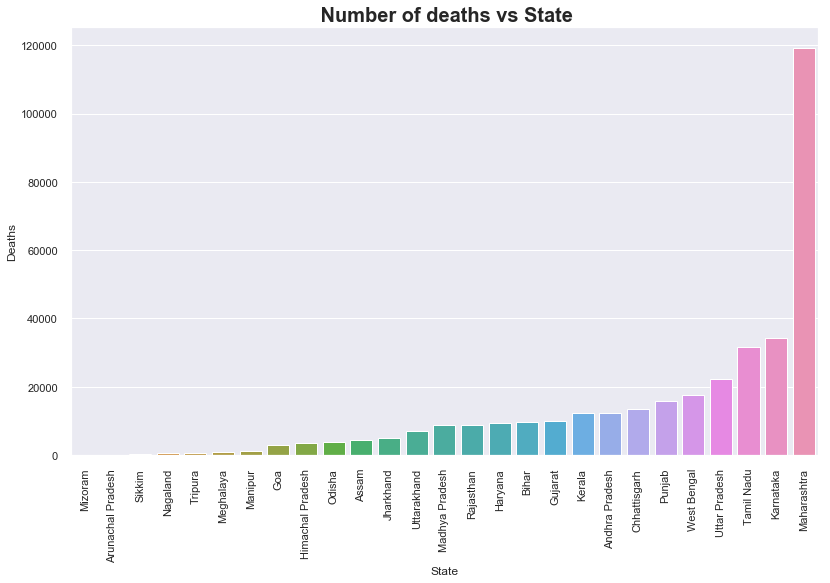

In [139]:
sns.barplot(x='State',y='Deaths',data=final_data.sort_values(by='Deaths'))
plt.xticks(rotation='vertical')
plt.title(" Number of deaths vs State",fontweight="bold",fontsize=20)

Text(0.5,1,' Active cases vs States')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



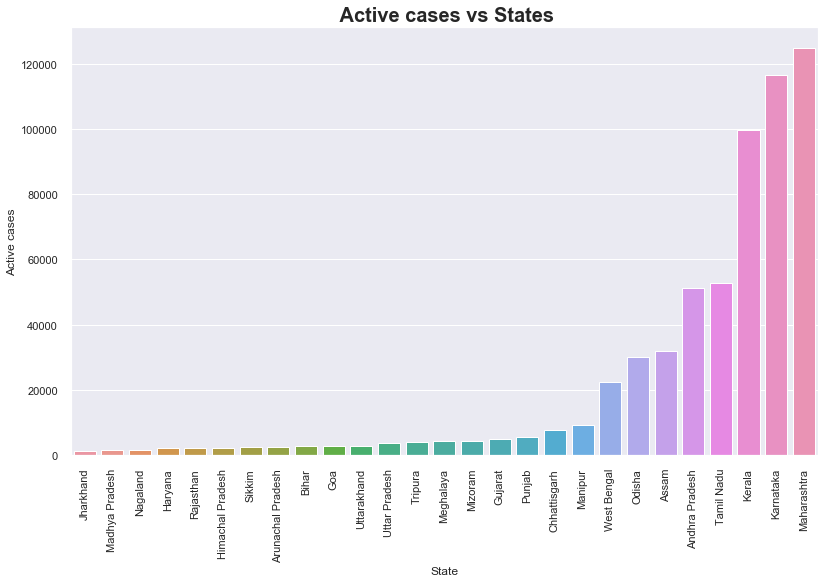

In [140]:
sns.barplot(x='State',y='Active cases',data=final_data.sort_values(by='Active cases'))
plt.xticks(rotation='vertical')
plt.title(" Active cases vs States",fontweight="bold",fontsize=20)

Text(0.5,1,' Recoveries vs State')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



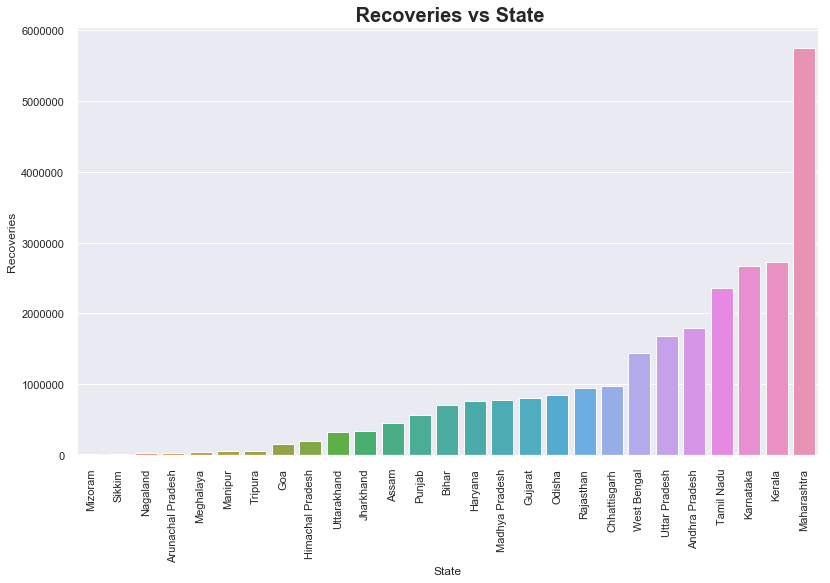

In [141]:
sns.barplot(x='State',y='Recoveries',data=final_data.sort_values(by='Recoveries'))
plt.xticks(rotation='vertical')
plt.title(" Recoveries vs State",fontweight="bold",fontsize=20)

#### Deaths and Recovery per identified positive cases

Text(0.5,0,'Percentage of deaths per identified positive case( % )')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



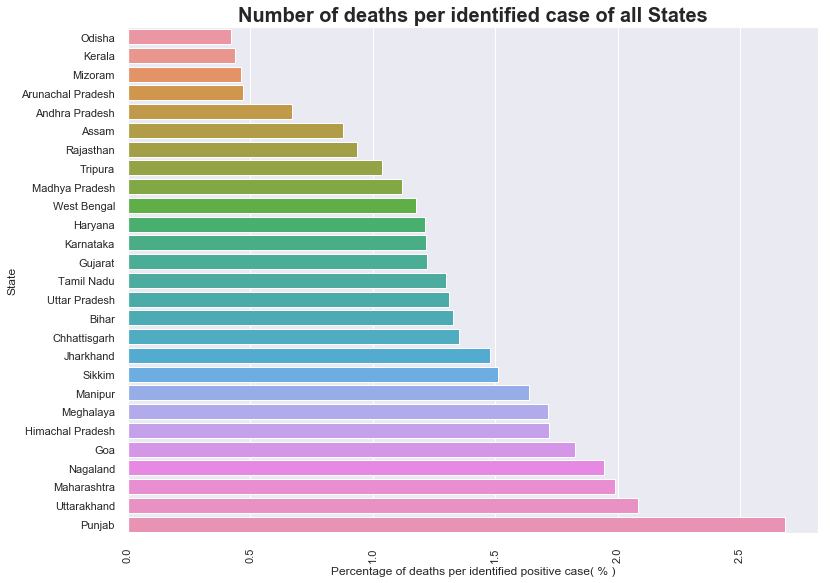

In [142]:
Dratios=[]
for cases,deaths in zip(final_data['Total cases'],final_data['Deaths']):
    ratio= (deaths/cases)*100
    Dratios.append(ratio)

Dratio_df=pd.DataFrame(list(zip(final_data['State'],Dratios)),columns=['State','Ratio'])
Dratio_df=Dratio_df.sort_values(by='Ratio').reset_index()
sns.set()
plt.xticks(rotation='vertical')
sns.barplot(y='State',x='Ratio',data=Dratio_df);
plt.title("Number of deaths per identified case of all States",fontweight="bold",fontsize=20)
plt.xlabel("Percentage of deaths per identified positive case( % )")

Text(0.5,0,'Percentage of recoveries per identified positive case( % )')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



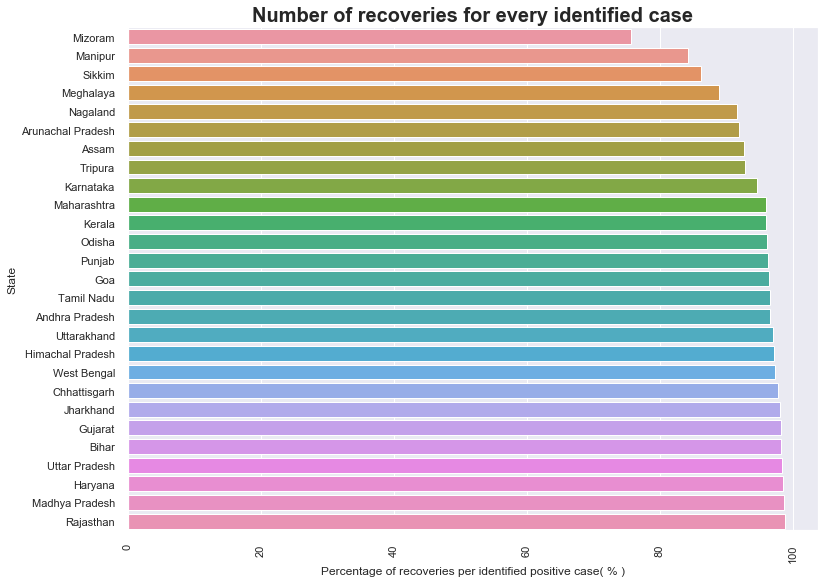

In [143]:
Rratios=[]
for cases,recoveries in zip(final_data['Total cases'],final_data['Recoveries']):
    ratio= (recoveries/cases)*100
    Rratios.append(ratio)
Rratio_df=pd.DataFrame(list(zip(final_data['State'],Rratios)),columns=['State','Ratio'])
Rratio_df=Rratio_df.sort_values(by='Ratio').reset_index()
sns.set()
plt.xticks(rotation='vertical')
sns.barplot(y='State',x='Ratio',data=Rratio_df);
plt.title("Number of recoveries for every identified case",fontweight="bold",fontsize=20)
plt.xlabel("Percentage of recoveries per identified positive case( % )")

In [145]:
Dratios=[round(val,3) for val in Dratios]
final_data['Death ratio']=list(Dratios)
final_data.to_excel('covidinfo.xlsx')
final_data

,State,Latitude,Longitude,Total cases,Deaths,Recoveries,Active cases,Death ratio
0,Andhra Pradesh,15.91,79.74,1862036,12452,1798380,51204,0.669
1,Arunachal Pradesh,28.21,94.72,33916,160,31189,2567,0.472
2,Assam,26.20,92.93,490907,4310,454726,31871,0.878
3,Bihar,25.09,85.31,720505,9569,708231,2705,1.328
4,Chhattisgarh,21.27,81.86,992074,13407,971057,7610,1.351
5,Goa,15.29,74.12,165197,3013,159419,2765,1.824
6,Gujarat,22.25,71.19,822758,10040,807911,4807,1.220
7,Haryana,29.05,76.08,767900,9314,756426,2160,1.213
8,Himachal Pradesh,31.10,77.17,201049,3461,195301,2287,1.721
9,Jharkhand,23.61,85.27,344914,5104,338446,1364,1.480


#### Click on the Circle marker to get the details for each state on Folium map

In [146]:
#### retreiving the data from final table and plotting it on the INDIA map

India = folium.Map(location = [20.5937,78.9629],zoom_start=4.5)


for state,lat,long,total_cases,Death,Recov,Active,Deathratio in zip(list(final_data['State']),list(final_data['Latitude']),list(final_data['Longitude']),list(final_data['Total cases']),list(final_data['Deaths']),list(final_data['Recoveries']),list(final_data['Active cases']),list(final_data['Death ratio'])):
    #for creating circle marker
    
    folium.CircleMarker(location = [lat,long],
                       radius = 5,
                       color='red',
                       fill = True,
                       fill_color="red").add_to(India)

    #for creating marker
    folium.Marker(location = [lat,long],
                  # adding information that need to be displayed on popup
                  popup=folium.Popup(('<strong><b>State  : '+state+'</strong> <br>' +
                    '<strong><font color= blue>Total Cases :</font> '+str(total_cases)+'</striong><br>' +
                    '<strong><font color= red>Deaths : </font>'+str(Death)+'</striong><br>' +
                    '<strong><font color=green>Recoveries : </font>'+str(Recov)+'</striong><br>' +
                    '<strong><font color=orange>Death ratio : </font>'+str(Deathratio)+"%"+'</striong><br>' +
                    '<strong><font color=brown>Active Cases :</font>'+str(Active)+'</striong>' ),max_width=200)).add_to(India)
#to show the map

India

#webbrowser.open(map, new=2)

### Project by Abhishek Venugopal